# Melbourne Housing Project

* Dữ liệu thu thập giá nhà khu vực Melbourne của Australia.
* Nguồn dữ liệu [ở đây](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [1]:
# import các thư viện được sử dụng
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
# from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.feature_selection import RFE

In [2]:
root = ["Dataset\Melbourne_housing_FULL.csv" , "Dataset\MELBOURNE_HOUSE_PRICES_LESS.csv"]

In [3]:
df = pd.read_csv("Melbourne_housing_FULL.csv")  # root[0]

### Chọn file dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
df.columns.difference(df1.columns)

Index(['Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'Landsize', 'Lattitude',
       'Longtitude', 'YearBuilt'],
      dtype='object')

#### Nhận xét:
* Dữ liệu file `MELBOURNE_HOUSE_PRICES_LESS` nhiều hơn và gần gấp đôi file `Melbourne_housing_FULL`.
* Dữ liệu file `MELBOURNE_HOUSE_PRICES_LESS` cũng đầy đủ và ít giá trị null hơn.
* Mặc dù dữ liệu file `Melbourne_housing_FULL` không được tốt tuy nhiên file này có nhiều thuộc tính hơn và những thuộc khá quan trọng trong việc dự đoán giá nhà như `'Bathroom', 'Bedroom2', 'BuildingArea', 'Car', 'Landsize', 'Lattitude','Longtitude', 'YearBuilt'`.

**Kết luận:** Chúng ta sẽ tập trung thực hiện phân tích, xử lý và áp dụng mô hình với file dữ liệu `Melbourne_housing_FULL`.

### Chi tiết dữ liệu Melbourne_housing_FULL

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**Mô tả thuộc tính:** Bao gồm 21 thuộc tính và 34857 dòng.
* `Suburb` là khu vực ngoại ô.
* `Address` là địa chỉ nhà.
* `Rooms` là số lượng phòng.
* `Type` là loại phòng.
* `Price` là giá nhà bằng dollars úc.
* `Method` là phương thức bán nhà.
* `SellerG` là đại lý bất động sản.
* `Date` là ngày bán.
* `Distance` là khoảng cách tính từ CBD (trung tâm thương mại chính của Sydney) tính bằng Kilomet.
* `Regionname` là khu vực chung của châu ÚC.
* `Propertycount` là số lượng thuộc tính tồn tại ở khu vực ngoại ô.
* `Bedroom2` là số lượng phòng ngủ.
* `Bathroom` là số lượng phòng tắm.
* `Car` là số lượng có thể để xe ô tô.
* `Landsize` là diện tích đất tính bằng mét.
* `BuildigArea` là kích thước tòa nhà tính bằng mét.
* `YearBuilt` là năm nhà được xây dưng.
* `CouncilArea` là hội đồng quản lý khu vực.
* `Lattitude` và `Longtitude` là tọa độ nhà.
* `Postcode` là mã bưu chính.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

**Nhận xét:**
* Dữ liệu có 12 thuộc tính kiểu `float` và 8 thuộc tính `Object` và 1 thuộc tính `int`
* Nhiều thuộc tính bị thiếu như `Price, Car, Beadroom2, Bathroom, YearBuilt, Longititude và Lattitude, BuildingArea, Landsize`.
* Và một số thuộc tính thiếu ít như `Regionname, Propertycount, CouncilArea, Postcode và Distance` 3 mẫu dữ liệu thiếu không đáng kể -> có thể do thiếu sót khi lấy dữ liệu.

**Kết luận:** Những thuộc tính quan trọng trong việc dữ đoán giá nhà thiếu khá nhiều cần có phương pháp tiền xử lý phù hợp

### Tiền xử lý

In [4]:
df_ = df.dropna(subset = ["Price"],axis = 0).reset_index() # xóa các giá trị Nan của thuộc tính Price

In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          27247 non-null  int64  
 1   Suburb         27247 non-null  object 
 2   Address        27247 non-null  object 
 3   Rooms          27247 non-null  int64  
 4   Type           27247 non-null  object 
 5   Price          27247 non-null  float64
 6   Method         27247 non-null  object 
 7   SellerG        27247 non-null  object 
 8   Date           27247 non-null  object 
 9   Distance       27246 non-null  float64
 10  Postcode       27246 non-null  float64
 11  Bedroom2       20806 non-null  float64
 12  Bathroom       20800 non-null  float64
 13  Car            20423 non-null  float64
 14  Landsize       17982 non-null  float64
 15  BuildingArea   10656 non-null  float64
 16  YearBuilt      12084 non-null  float64
 17  CouncilArea    27244 non-null  object 
 18  Lattit

In [6]:
# xử lý missing value với KNN
numerical = df_.select_dtypes(include=np.number)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
new_data = pd.DataFrame(imputer.fit_transform(numerical))
new_data.columns = numerical.columns

In [ ]:
# xử lý missing value với Mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(numerical)

In [7]:
df_[new_data.columns] = new_data

In [ ]:
new_data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,268.0,1967.0,-37.79960,144.998400,4019.0
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.993400,4019.0
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.994400,4019.0
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,208.5,1952.5,-37.79690,144.996900,4019.0
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.994100,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,4.0,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,161.0,1924.5,-37.81053,144.884670,6543.0
27243,2.0,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.888260,6543.0
27244,2.0,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.878560,6543.0
27245,3.0,1140000.0,6.3,3013.0,2.0,1.5,1.0,408.0,145.0,1983.0,-37.83263,145.039275,6543.0


In [8]:
df_ = df_.dropna()
df_ = df_.drop("index",axis = 1,errors="ignore")
df_["Date"] = pd.to_datetime(df_["Date"],format = '%d/%m/%Y')

In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27244 non-null  object        
 1   Address        27244 non-null  object        
 2   Rooms          27244 non-null  float64       
 3   Type           27244 non-null  object        
 4   Price          27244 non-null  float64       
 5   Method         27244 non-null  object        
 6   SellerG        27244 non-null  object        
 7   Date           27244 non-null  datetime64[ns]
 8   Distance       27244 non-null  float64       
 9   Postcode       27244 non-null  float64       
 10  Bedroom2       27244 non-null  float64       
 11  Bathroom       27244 non-null  float64       
 12  Car            27244 non-null  float64       
 13  Landsize       27244 non-null  float64       
 14  BuildingArea   27244 non-null  float64       
 15  YearBuilt      2724

### Select Feature



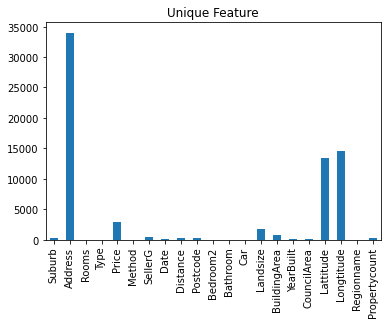

In [ ]:
df.apply(lambda x: len(x.unique())).plot.bar(title = "Unique Feature");

In [31]:
columnobject = list(df.select_dtypes(include = np.object).columns)
columnnumber = list(df.select_dtypes(include = np.number).columns)
columnobject.append("Price")

In [32]:
df_selecter = df.dropna().reset_index()
df_selecter[columnobject]

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname,Price
0,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan,1035000.0
1,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan,1465000.0
2,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan,1600000.0
3,Abbotsford,124 Yarra St,h,S,Nelson,7/05/2016,Yarra City Council,Northern Metropolitan,1876000.0
4,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,Yarra City Council,Northern Metropolitan,1636000.0
...,...,...,...,...,...,...,...,...,...
8882,Wollert,27 Birchmore Rd,h,PI,Ray,24/02/2018,Whittlesea City Council,Northern Metropolitan,500000.0
8883,Wollert,35 Kingscote Wy,h,SP,RW,24/02/2018,Whittlesea City Council,Northern Metropolitan,570000.0
8884,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,Maribyrnong City Council,Western Metropolitan,888000.0
8885,Yarraville,147A Severn St,t,S,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan,705000.0


In [ ]:
s = df_selecter[columnobject]

In [ ]:
def selectObject(columnobject,df):
  columnobject.remove("Price")
  for col in columnobject:
    uniq = df[col].unique()
    _ , pvalue = f_oneway(*(df[df[col] == i]["Price"] for i in uniq))
    if (pvalue < 0.05 and len(uniq) < 200): #kiểm định với mức tin cậy 95%
      print(col +": {0}".format(pvalue))
  columnobject.append("Price")


In [ ]:
selectObject(columnobject,df_selecter[columnobject])

Type: 2.3343518277719524e-274
Method: 5.75707678533057e-38
Date: 1.7599026976641507e-35
CouncilArea: 0.0
Regionname: 0.0


Dựa trên kiểm định với độ tin cậy là 95% và Số lượng các phần tử phân biệt ít hơn 200 phần tử -> Kết quả ta được được 5 thuộc tính categorical là `Type, Method, Date, CouncilArea, Regionname`.



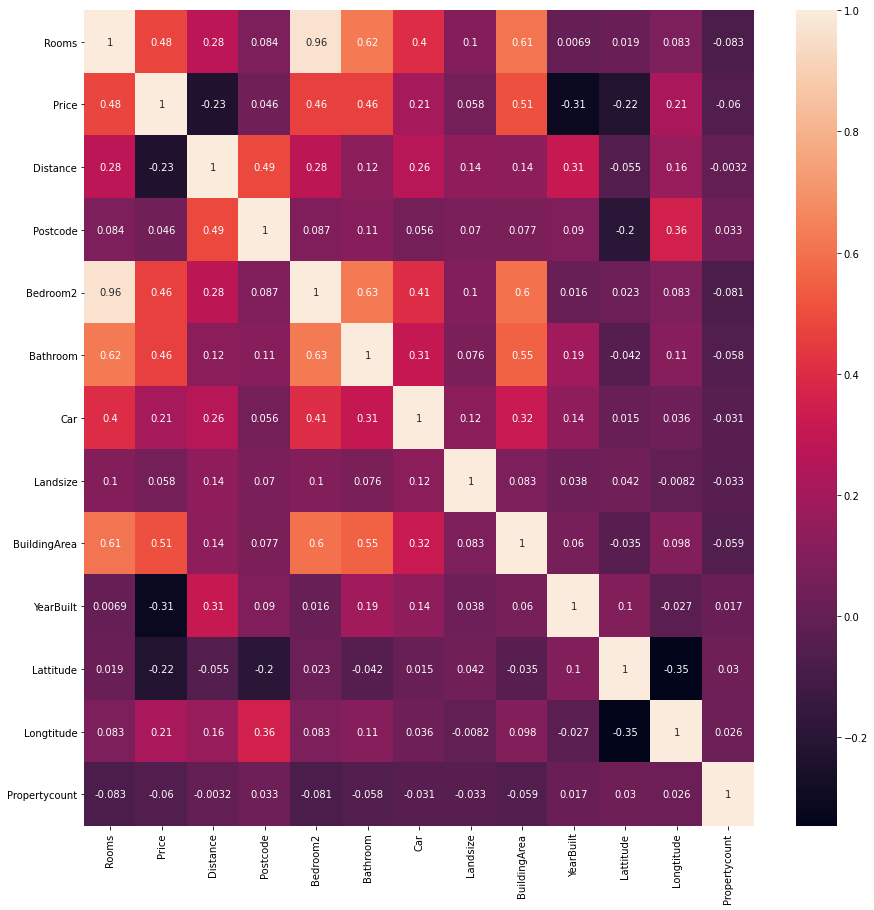

In [ ]:
# heatmap trước khi xử lý dữ liệu
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_selecter[columnnumber].corr(), annot=True)

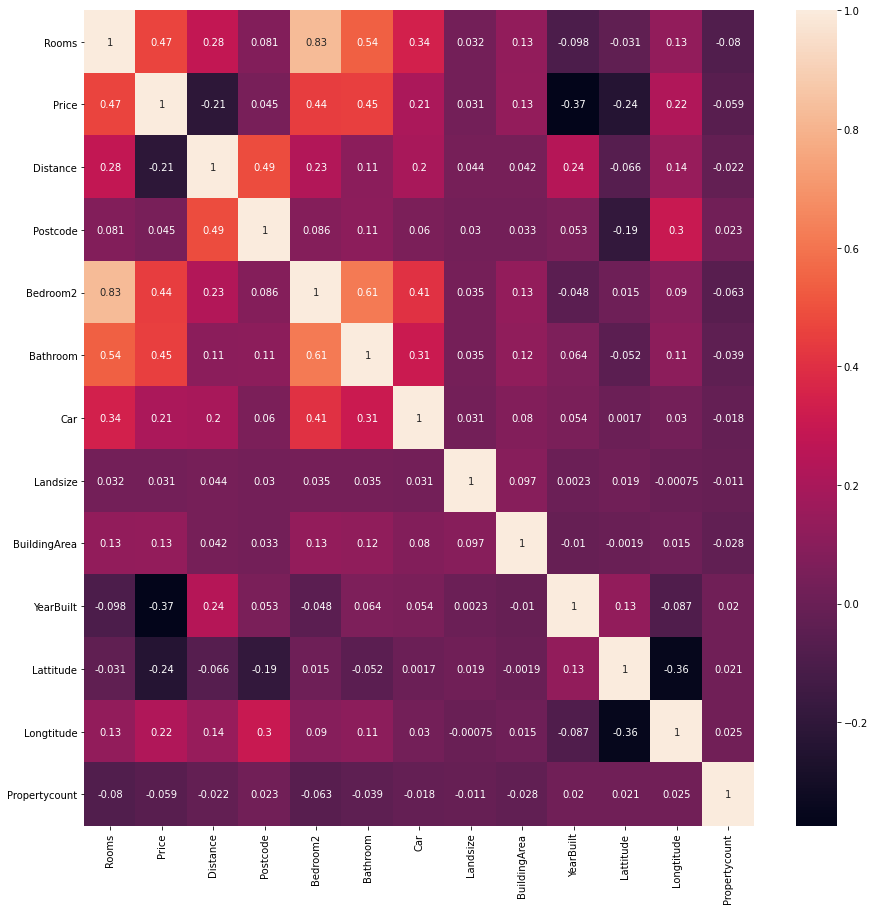

In [ ]:
# heatmap sau khi xử lý dữ liệu
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_.corr(), annot=True)

**Nhận xét:**

*   Nhìn chung thì không có thuộc tính nào có mối quan hệ mạnh với nhau.
*   Không có thuộc tính nào có mối tương quan lớn hơn 0.95 do đó chúng ta sử dụng tất cả các thuộc tính Numerical.





### Khám phá dữ liệu

In [12]:
df_.describe(include= 'O')

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,27244,27244,27244,27244,27244,27244,27244
unique,344,26748,3,5,349,33,8
top,Reservoir,5 Charles St,h,S,Nelson,Boroondara City Council,Southern Metropolitan
freq,727,4,18470,17514,2735,2520,8524


In [13]:
pd.set_option('float_format', '{:.2f}'.format)
df_.describe(datetime_is_numeric=True)

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27244.00,27244.00,27244,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00
mean,2.99,1050210.03,2017-05-23 14:41:47.473312768,11.28,3113.80,3.04,1.58,1.72,594.63,155.02,1967.65,-37.80,144.99,7566.78
min,1.00,85000.00,2016-01-28 00:00:00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.19,144.42,83.00
25%,2.00,635000.00,2016-11-19 00:00:00,6.40,3046.00,2.50,1.00,1.00,275.00,105.00,1950.00,-37.86,144.92,4294.00
50%,3.00,870000.00,2017-07-08 00:00:00,10.50,3088.00,3.00,1.50,2.00,521.00,136.00,1970.00,-37.80,145.00,6567.00
75%,4.00,1295000.00,2017-10-28 00:00:00,14.00,3153.00,3.50,2.00,2.00,659.00,180.00,1991.50,-37.75,145.06,10412.00
max,16.00,11200000.00,2018-03-17 00:00:00,48.10,3978.00,20.00,9.00,18.00,433014.00,44515.00,2019.00,-37.40,145.53,21650.00
std,0.95,641492.29,NaN,6.79,111.14,0.92,0.67,0.94,3108.06,322.66,32.08,0.09,0.12,4492.38


**Nhận xét:**
* Phần lớn các ngôi nhà được bán năm gần và xung quanh trung tâm thành phố Melbourne.
* Một số thuộc tính có giá trị min là 0. 
    * Nguyên nhân:  Có thể do người nhập liệu cho bằng 0 khi thiếu thiếu dữ liệu.
* Ngày thu thập dữ liệu từ 28/1/2016 đến 17/3/2018.
* Có những ngôi nhà rất lâu đời được bán đi như ngồi nhà được xây dựng năm 1967.

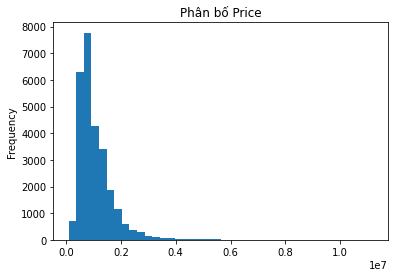

In [14]:
df_["Price"].plot.hist(bins = 40,title="Phân bố Price");

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


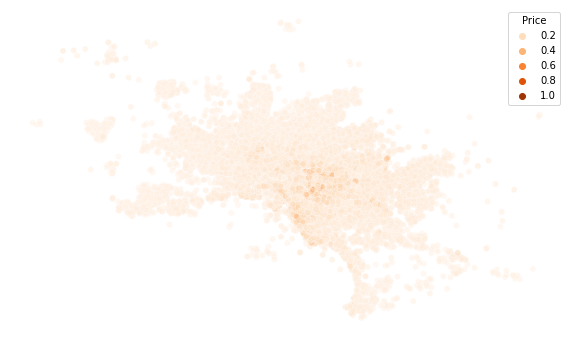

In [34]:
plt.figure(figsize=(10,6))
plt.axis("off")
sns.scatterplot(df_.Longtitude,df_.Lattitude,hue= df_.Price,markers ="o",alpha = 0.5,palette="Oranges");

* Những ngôi nhà đắt giá đều tập trung xung quanh thành phố Melbourne.

In [40]:
df_[df_.Price == df_.Price.max() ]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
20075,Brighton,6 Cole St,4.0,h,11200000.0,VB,hockingstuart,2017-10-28,10.5,3186.0,4.0,3.0,2.0,1400.0,290.65,1920.0,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0


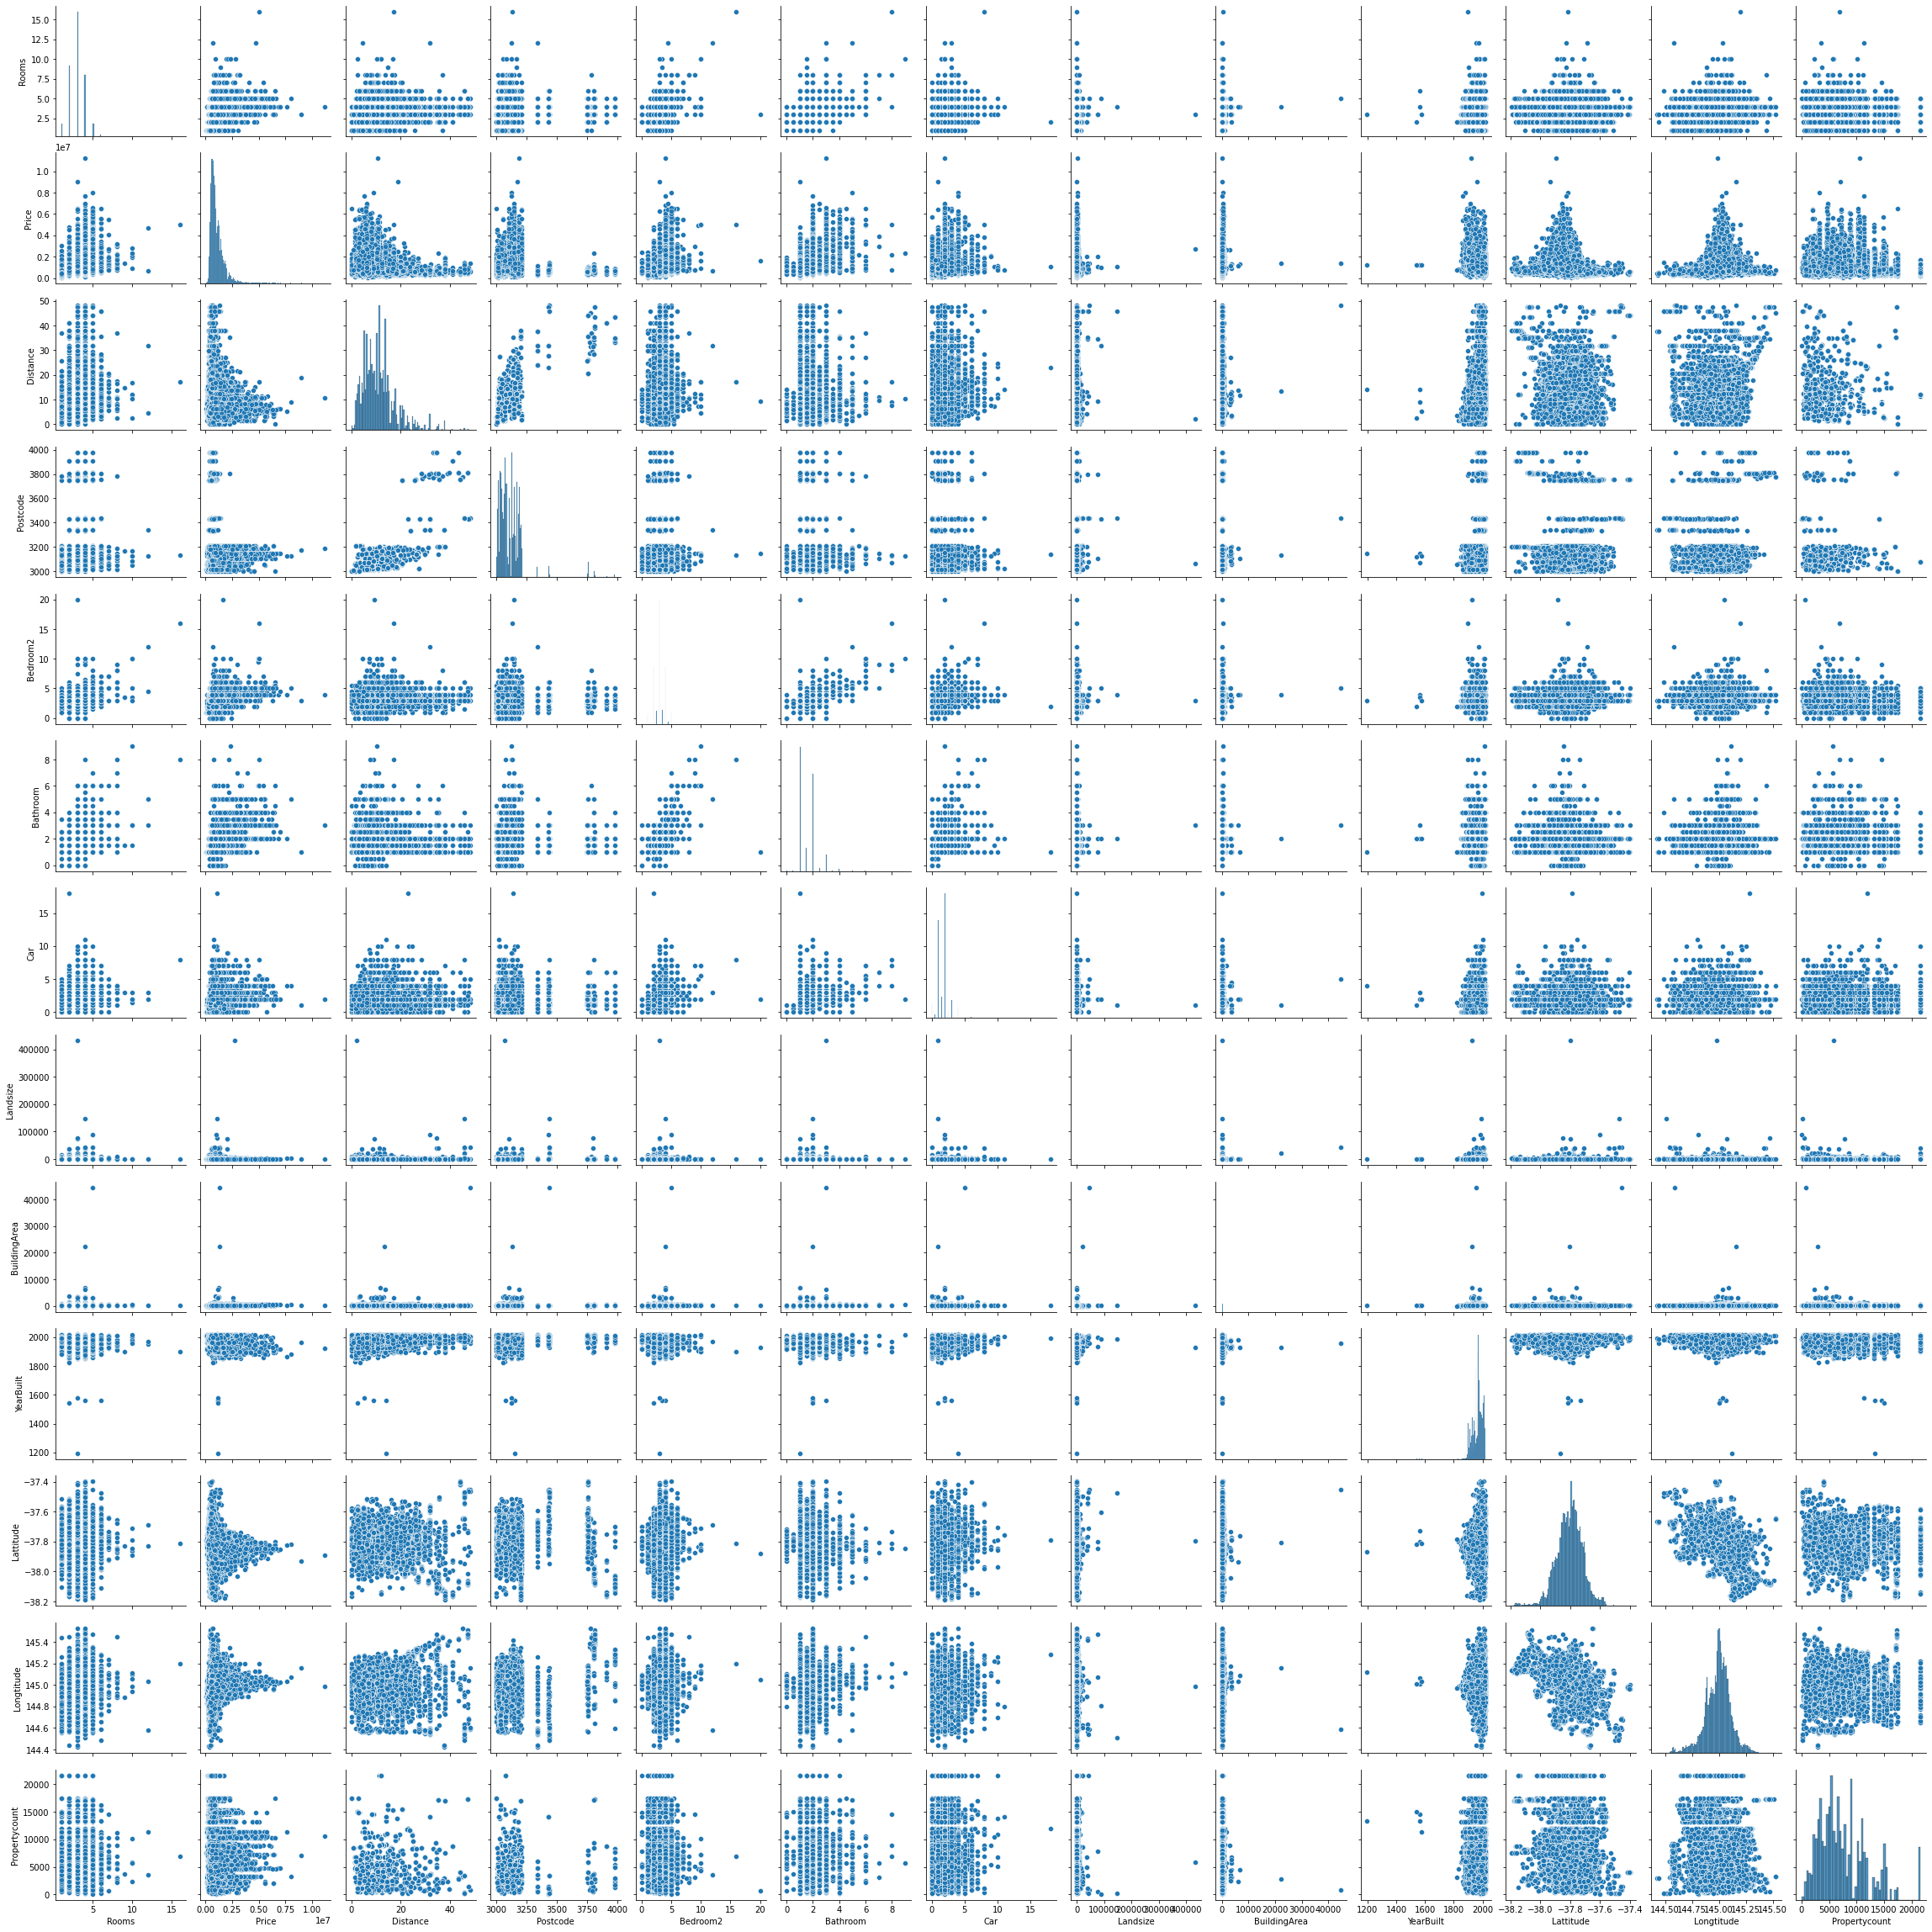

In [41]:
sns.pairplot(df_)

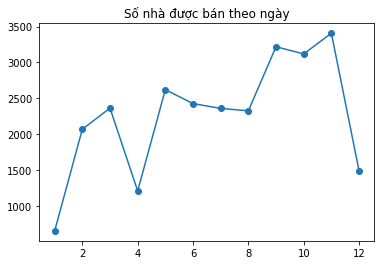

In [57]:
df_.Date.dt.month.value_counts().sort_index().plot.line(title = "Số nhà được bán theo tháng",marker="o" )

* Ta thấy đầu năm thấp và cuối năm số lượng nhà bán rất thấp 
    * Nguyên nhân: Do thu thấp dữ liệu thiếu và không cân bằng ( Dữ liệu được thu thập từ 2016-11-23 đến 2018-10-15)
        Hoặc vì khoảng thời gian đó họ cần một nơi ổn định nên số bán rất thấp.  


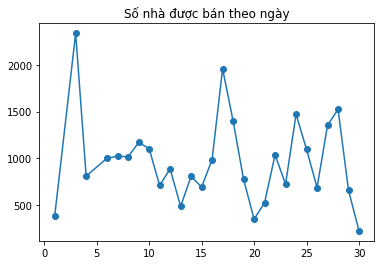

In [60]:
df_.Date.dt.day.value_counts().sort_index().plot.line(title = "Số nhà được bán theo ngày trong tháng",marker="o" )

* Nhìn chung nhà được bán vào lúc đầu tháng và giữa tháng.

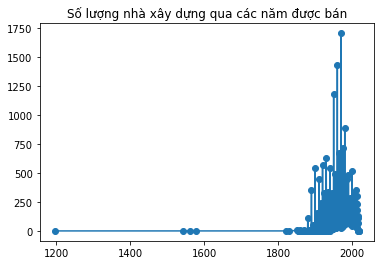

In [56]:
df_.YearBuilt.value_counts().sort_index().plot.line(marker="o",title="Số lượng nhà xây dựng qua các năm được bán");

* Phần lớn những ngôi nhà được bán xây dựng năm từ 1950-1970

### Data Preparation

In [62]:
mindays = df_["Date"].min()
df_["days"] = df_["Date"].apply(lambda x: (x-mindays).days)   # thực tính thời gian bán đối với ngày nhỏ nhất

In [63]:
df_.reset_index(drop= True,inplace = True)

In [64]:
dummi = pd.get_dummies(df_[["Type","Method","CouncilArea","Regionname"]]) # one_hot các thuộc tính categorical

In [65]:
X = df_.drop(columnobject,axis =1).join(dummi)   # lọc các thuộc tính được chọn thực hiện model

In [66]:
y = df_["Price"]

In [67]:
# Holdout
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.4,random_state = 1)

### Training Linear Regression

In [68]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
ln = LinearRegression()
# ln.fit(X_train,y_train)
#cross_validation Kfold
score = cross_val_score(ln, X_train, y_train, scoring='r2', cv=folds)

In [69]:
score # có dấu hiệu thất thường có một trường hợp r2 rất thấp

array([0.62142828, 0.1155604 , 0.60067563, 0.61998689, 0.64959917])

In [70]:
X_train.shape

(16346, 62)

Hyperparameter Tuning Using Grid Search

In [71]:
# chọn số lượng thuộc tính phù hợp cho kết quả tốt trên những thuộc tính đã chọn
hyper_params = [{'n_features_to_select': list(range(1, 63))}]

ln = LinearRegression()
ln.fit(X_train,y_train)
rfe = RFE(ln)      # model select feature
model_cv = GridSearchCV(estimator = rfe,  param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1,return_train_score=True)    
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 62 candidates, totalling 310 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:  4.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[cv_results["rank_test_score"] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
56,0.278775,0.012335,0.003914,0.000416,57,{'n_features_to_select': 57},0.616166,0.664698,0.596871,0.616798,0.645399,0.627986,0.024017,1,0.632228,0.620899,0.637217,0.632632,0.62482,0.629559,0.005877


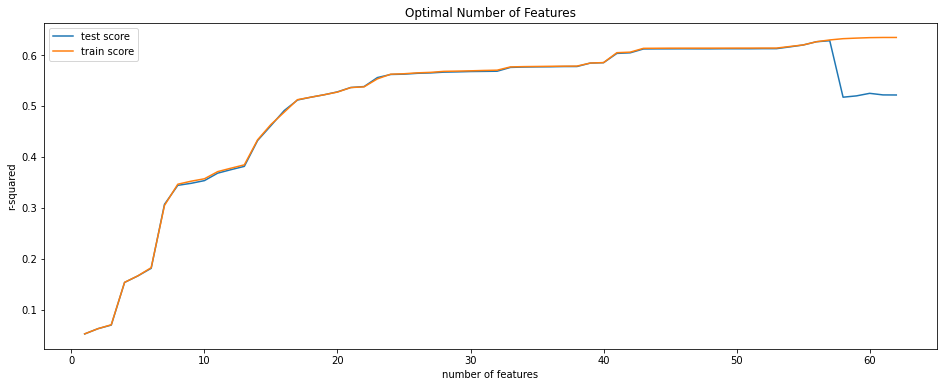

In [73]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

**Nhận xét:**
* Như ta thấy mô hình đạt kết quả tốt nhất khi số thuộc tính là n_feature = 57.
* Điều bất thường là những thuộc tính còn lại khiến kết quả của mô hình rất tệ, có thể do quá trình xử lý missing value không hợp dẫn đến như vậy.

Final model

In [78]:
# final model
n_features_optimal = 57

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)
msqe = metrics.mean_squared_error(y_test, y_pred)
print("MSE :",msqe)

0.6486486179276283
MSE : 145566116831.97076


In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Rooms', True, 1),
 ('Distance', True, 1),
 ('Postcode', False, 2),
 ('Bedroom2', True, 1),
 ('Bathroom', True, 1),
 ('Car', True, 1),
 ('Landsize', False, 5),
 ('BuildingArea', False, 4),
 ('YearBuilt', True, 1),
 ('Lattitude', True, 1),
 ('Longtitude', True, 1),
 ('Propertycount', False, 6),
 ('days', False, 3),
 ('Type_h', True, 1),
 ('Type_t', True, 1),
 ('Type_u', True, 1),
 ('Method_PI', True, 1),
 ('Method_S', True, 1),
 ('Method_SA', True, 1),
 ('Method_SP', True, 1),
 ('Method_VB', True, 1),
 ('CouncilArea_Banyule City Council', True, 1),
 ('CouncilArea_Bayside City Council', True, 1),
 ('CouncilArea_Boroondara City Council', True, 1),
 ('CouncilArea_Brimbank City Council', True, 1),
 ('CouncilArea_Cardinia Shire Council', True, 1),
 ('CouncilArea_Casey City Council', True, 1),
 ('CouncilArea_Darebin City Council', True, 1),
 ('CouncilArea_Frankston City Council', True, 1),
 ('CouncilArea_Glen Eira City Council', True, 1),
 ('CouncilArea_Greater Dandenong City Council', True

In [75]:
print('Coefficients: \n', rfe.estimator_.coef_)

Coefficients: 
 [ 158962.21583528  -32716.92250235   19595.61387104  203098.29139155
   39643.29801078   -2900.9527487  -551590.73280439   16764.50374888
  220207.20091698  -20731.65587418 -199475.54504198  -37939.51758941
   25029.44339904   13822.74827537   -8545.14186733    7632.46778236
 -129724.15231734  418484.09351434  401102.05089324 -368723.06179666
   82177.94817367    3973.78777174  -57170.57404172  187371.81127739
   97782.13562661  -37402.76825995 -228613.10842665 -165101.50397206
   58132.78055241 -163666.87498116  524715.75373494  -23699.85906138
 -327311.2206852   -33729.25877242   49264.87411776 -343806.00729539
  277319.83388626   22927.49360981 -126273.03668737  118963.98664662
  -89285.3200411  -185500.40567995  138014.1861487   420178.97554938
  -30820.569333    -83623.02542001 -472220.04192339   45936.68682214
   20324.39036954   -2740.91862945  -11501.64202021 -180343.80924152
  147007.5217537   -41582.65491817  -82532.78321989  -42654.84969143
  214349.13596696]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


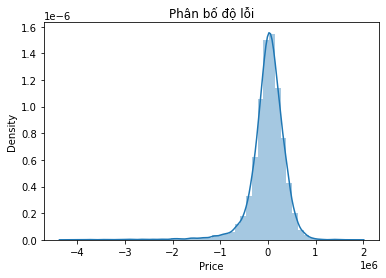

In [76]:
plt.title("Phân bố độ lỗi")
sns.distplot(y_pred-y_test,bins= 50);

Text(0, 0.5, 'Residual')

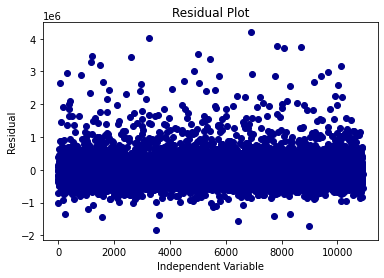

In [29]:
residuals = y_test.reset_index(drop=True)-y_pred  
# y_test sau khi train split vẫn giữ index
plt.plot(residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

**Nhận xét:**
* Residual có phân phối chuẩn.
* Phần lớn các độ chênh lệch tập trung xung quanh giá trị 0.
* Và một số giá trị ngoại lai có độ chênh lệch rất rớn.

#### Using PCA

In [30]:
# áp dụng giảm chiều giữ 2 thuộc tính
pca = PCA(n_components=2,random_state=1)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
pca.explained_variance_ratio_

array([0.90716446, 0.08359745])

In [33]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
ln = LinearRegression()
#cross_validation Kfold with K = 5
score = cross_val_score(ln, X_train_pca, y_train, scoring='r2', cv=folds)
score

array([0.00383692, 0.00548031, 0.00631127, 0.00627444, 0.00627219])

**Nhận xét:**
* Kết quả độ chính xác của mô hình rất thấp khi thực hiện giảm chiều xuống 2.

In [34]:
ln = LinearRegression()
ln.fit(X_train_pca,y_train)

# predict prices of X_test
y_pred = ln.predict(X_test_pca)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

-0.010321373264801759


In [35]:
print('Coefficients: \n', ln.coef_)

Coefficients: 
 [-8.78244588 21.28704376]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


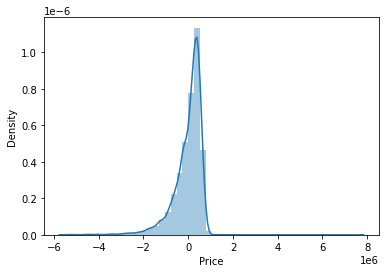

In [36]:
sns.distplot(y_pred-y_test,bins= 50);

Text(0, 0.5, 'Residual')

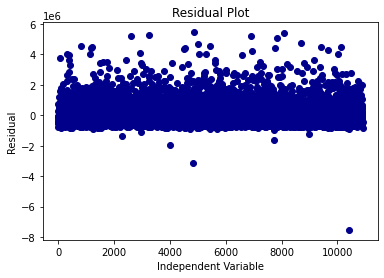

In [37]:
residuals = y_test.reset_index(drop=True)-y_pred  
# y_test sau khi train split vẫn giữ index
plt.plot(residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [84]:
# áp dụng PCA với mức thông tin được giữ lại là 95%
pca = PCA(.95)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
ln = LinearRegression()
#cross_validation Kfold with K = 5
score = cross_val_score(ln, X_train_pca, y_train, scoring='r2', cv=folds)
score

array([0.00383692, 0.00548031, 0.00631127, 0.00627444, 0.00627219])

* Dù thông tin giữ lại bao nhiêu cũng cho kết quả không tốt cho mô hình dự đoán Linear Regression.

### Evaluation

**Nhận xét:**
* Áp dụng PCA cho model cho kết quả rất tệ.
-> Nguyên nhân:  Có PCA đã loại bỏ đi các thông tin hữu ích để dự đoán giá nhà, khi giảm chiều dẫn đến dữ liệu bị Heteroscedasticity lớn.
* Model đạt kết quả tốt nhất với 57 thuộc tính trong 63 thuộc tính được chọn có R-Square là 0.65. (Các thuộc tính khiến kết quả thấp như `Postcode,Landsize,BuildingArea,Propertycount,Days`.
-> Nguyên nhân: Có thể khẳng định là do việc thực hiện lấp đầy các thuộc tính dữ liệu thiếu đã bị sai. Đặc biệt trong đó là 2 thuộc tính `BuildingArea và Landsize`. Bên cạnh đó thuộc tính `Postcode` không phù hợp để đưa vào dự đoán.

### Conclusions

* Không nên áp dụng PCA với model Linear Regression.
* Mỗi thuộc tính sẽ phù hợp với từng cách xử lý giá trị Nan khác nhau. Xử lý sai khiến kết quả mô hình kém.
